In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.graphics.regressionplots import influence_plot

In [6]:
ls

 Volume in drive C has no label.
 Volume Serial Number is FEA4-9C8F

 Directory of C:\Users\mrsks\OneDrive\Desktop\Data Science - Somnath\Assignments - Final\5. Multi Linear Regression

19-07-2022  22:13    <DIR>          .
19-07-2022  21:57    <DIR>          ..
19-07-2022  22:13    <DIR>          .ipynb_checkpoints
19-07-2022  21:57             2,436 50_Startups.csv
19-07-2022  21:58               468 proble_statement(50_startups).txt
19-07-2022  21:58             1,752 Toyota Corolla.txt
19-07-2022  22:13         1,921,964 Toyota Corolla_Multi Linear Regression.ipynb
19-07-2022  21:58           224,041 ToyotaCorolla (1).csv
19-07-2022  22:13                72 Untitled.ipynb
               6 File(s)      2,150,733 bytes
               3 Dir(s)  419,875,360,768 bytes free


In [2]:
data=pd.read_csv("50_Startups.csv")
data

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [4]:
data[data.duplicated()]

,R&D Spend,Administration,Marketing Spend,State,Profit


In [5]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


In [7]:
data.corr()

,R&D Spend,Administration,Marketing Spend,Profit
R&D Spend,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing Spend,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [8]:
data1=data.rename({"R&D Spend":"RD","Administration":"ADS","Marketing Spend":"MS"},axis=1)

In [9]:
data1

,RD,ADS,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [10]:
model=smf.ols("Profit~RD+ADS+MS",data=data1).fit()

In [11]:
model.params

Intercept    50122.192990
RD               0.805715
ADS             -0.026816
MS               0.027228
dtype: float64

In [12]:
model.tvalues , np.round(model.pvalues,5)

(Intercept     7.626218
 RD           17.846374
 ADS          -0.525507
 MS            1.655077
 dtype: float64,
 Intercept    0.00000
 RD           0.00000
 ADS          0.60176
 MS           0.10472
 dtype: float64)

In [13]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.951
Model:                            OLS   Adj. R-squared:                  0.948
Method:                 Least Squares   F-statistic:                     296.0
Date:                Tue, 19 Jul 2022   Prob (F-statistic):           4.53e-30
Time:                        22:15:03   Log-Likelihood:                -525.39
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      46   BIC:                             1066.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.012e+04   6572.353      7.626      0.000    3.69e+04    6.34e+04
RD             0.8057      0.045     17.846      0.000       0.715       0.897
ADS           -0.0268      0.051     -0.526      0.602      -0.130       0.076
MS             0.0272      0.016      1.655      0.105      -0.006       0.060
==============================================================================
Omnibus:                       14.838   Durbin-Watson:                   1.282
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               21.442
Skew:                          -0.949   Prob(JB):                     2.21e-05
Kurtosis:                       5.586   Cond. No.                     1.40e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.4e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
ml_c=smf.ols("Profit~ADS",data=data1).fit()
ml_c.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.020
Method:                 Least Squares   F-statistic:                     2.015
Date:                Tue, 19 Jul 2022   Prob (F-statistic):              0.162
Time:                        22:15:11   Log-Likelihood:                -599.63
No. Observations:                  50   AIC:                             1203.
Df Residuals:                      48   BIC:                             1207.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   7.697e+04   2.53e+04      3.040      0.004    2.61e+04    1.28e+05
ADS            0.2887      0.203      1.419      0.162      -0.120       0.698
==============================================================================
Omnibus:                        0.126   Durbin-Watson:                   0.099
Prob(Omnibus):                  0.939   Jarque-Bera (JB):                0.110
Skew:                           0.093   Prob(JB):                        0.947
Kurtosis:                       2.866   Cond. No.                     5.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [15]:
ml_c=smf.ols("Profit~RD",data=data1).fit()
ml_c.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.947
Model:                            OLS   Adj. R-squared:                  0.945
Method:                 Least Squares   F-statistic:                     849.8
Date:                Tue, 19 Jul 2022   Prob (F-statistic):           3.50e-32
Time:                        22:15:17   Log-Likelihood:                -527.44
No. Observations:                  50   AIC:                             1059.
Df Residuals:                      48   BIC:                             1063.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   4.903e+04   2537.897     19.320      0.000    4.39e+04    5.41e+04
RD             0.8543      0.029     29.151      0.000       0.795       0.913
==============================================================================
Omnibus:                       13.727   Durbin-Watson:                   1.116
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               18.536
Skew:                          -0.911   Prob(JB):                     9.44e-05
Kurtosis:                       5.361   Cond. No.                     1.65e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.65e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
ml_c=smf.ols("Profit~MS",data=data1).fit()
ml_c.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.550
Method:                 Least Squares   F-statistic:                     60.88
Date:                Tue, 19 Jul 2022   Prob (F-statistic):           4.38e-10
Time:                        22:15:23   Log-Likelihood:                -580.18
No. Observations:                  50   AIC:                             1164.
Df Residuals:                      48   BIC:                             1168.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept       6e+04   7684.530      7.808      0.000    4.46e+04    7.55e+04
MS             0.2465      0.032      7.803      0.000       0.183       0.310
==============================================================================
Omnibus:                        4.420   Durbin-Watson:                   1.178
Prob(Omnibus):                  0.110   Jarque-Bera (JB):                3.882
Skew:                          -0.336   Prob(JB):                        0.144
Kurtosis:                       4.188   Cond. No.                     4.89e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.89e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
ml_a=smf.ols("Profit~ADS+MS",data=data1).fit()
ml_a.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.610
Model:                            OLS   Adj. R-squared:                  0.593
Method:                 Least Squares   F-statistic:                     36.71
Date:                Tue, 19 Jul 2022   Prob (F-statistic):           2.50e-10
Time:                        22:15:28   Log-Likelihood:                -577.13
No. Observations:                  50   AIC:                             1160.
Df Residuals:                      47   BIC:                             1166.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.022e+04   1.77e+04      1.143      0.259   -1.54e+04    5.58e+04
ADS            0.3237      0.131      2.468      0.017       0.060       0.588
MS             0.2488      0.030      8.281      0.000       0.188       0.309
==============================================================================
Omnibus:                        6.584   Durbin-Watson:                   1.279
Prob(Omnibus):                  0.037   Jarque-Bera (JB):                6.524
Skew:                          -0.512   Prob(JB):                       0.0383
Kurtosis:                       4.443   Cond. No.                     1.30e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.3e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
rsq_r=smf.ols("RD~ADS+MS",data=data1).fit().rsquared
vif_r=1/(1-rsq_r)

rsq_a=smf.ols("ADS~RD+MS",data=data1).fit().rsquared
vif_a=1/(1-rsq_a)

rsq_m=smf.ols("MS~RD+ADS",data=data1).fit().rsquared
vif_m=1/(1-rsq_m)

# Putting the values in Dataframe format
d1={'Variables':['RD','ADS','MS'],'Vif':[vif_r,vif_a,vif_m]}
Vif_df=pd.DataFrame(d1)
Vif_df

,Variables,Vif
0,RD,2.468903
1,ADS,1.175091
2,MS,2.326773


C:\Users\mrsks\anaconda3\lib\site-packages\statsmodels\graphics\gofplots.py:993: UserWarning: marker is redundantly defined by the 'marker' keyword argument and the fmt string "bo" (-> marker='o'). The keyword argument will take precedence.
  ax.plot(x, y, fmt, **plot_style)


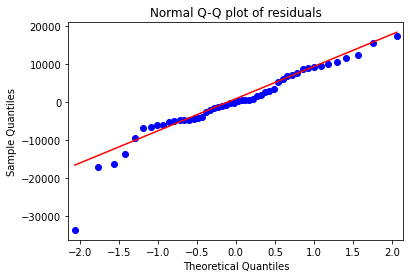

In [19]:
sm.qqplot(model.resid,line='q')
plt.title("Normal Q-Q plot of residuals")
plt.show()

In [20]:
list(np.where(model.resid<-30000))

[array([49], dtype=int64)]

In [21]:
def standard_values (vals) :
    return (vals - vals.mean())/vals.std()

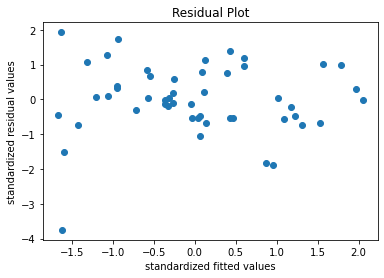

In [22]:
plt.scatter(standard_values(model.fittedvalues),standard_values(model.resid))
plt.title('Residual Plot')
plt.xlabel('standardized fitted values')
plt.ylabel('standardized residual values')
plt.show() 

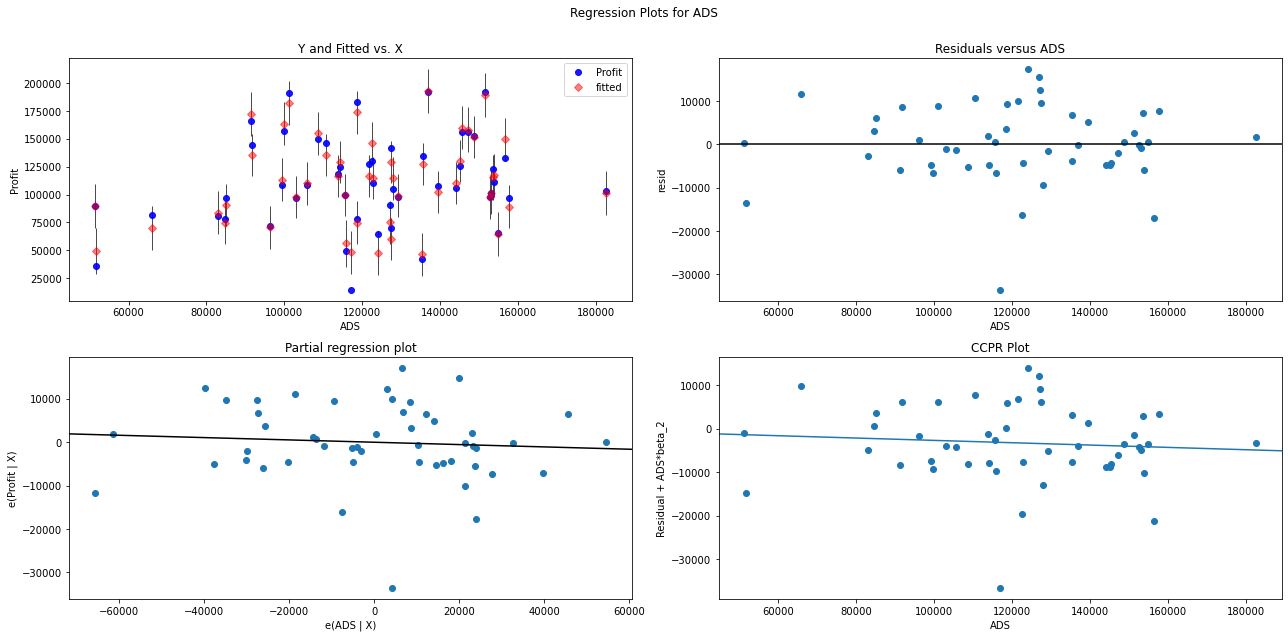

In [23]:
fig=plt.figure(figsize=(18,9))
sm.graphics.plot_regress_exog(model,'ADS',fig=fig)
plt.show()

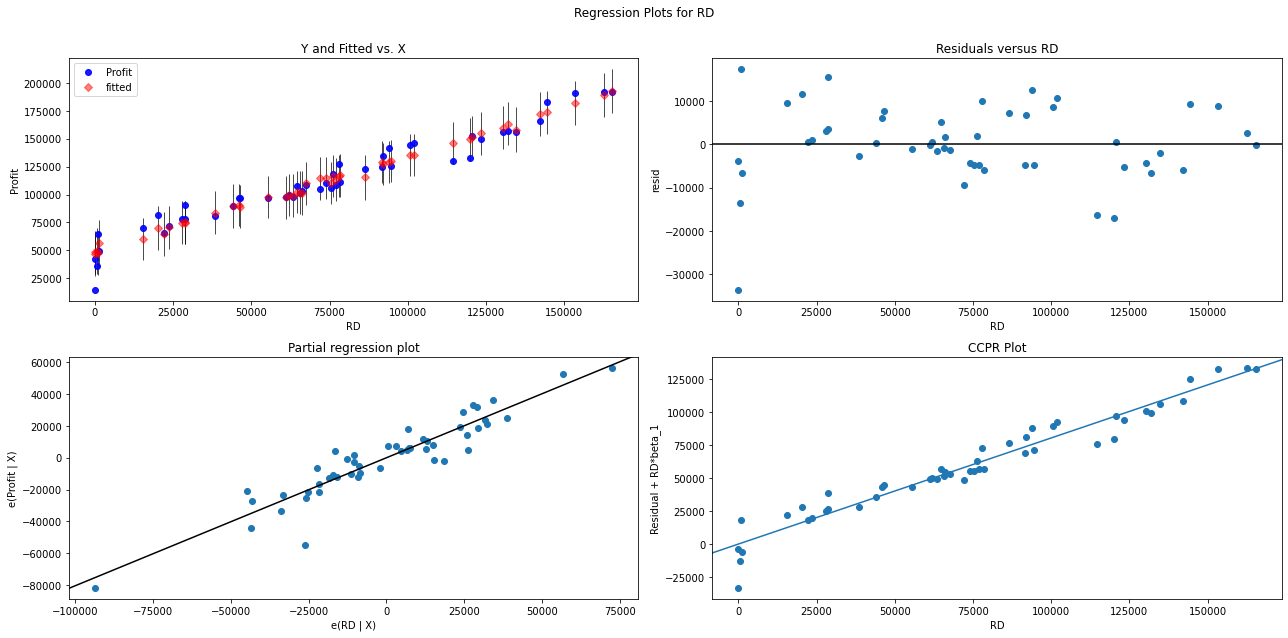

In [24]:
fig=plt.figure(figsize=(18,9))
sm.graphics.plot_regress_exog(model,'RD',fig=fig)
plt.show()

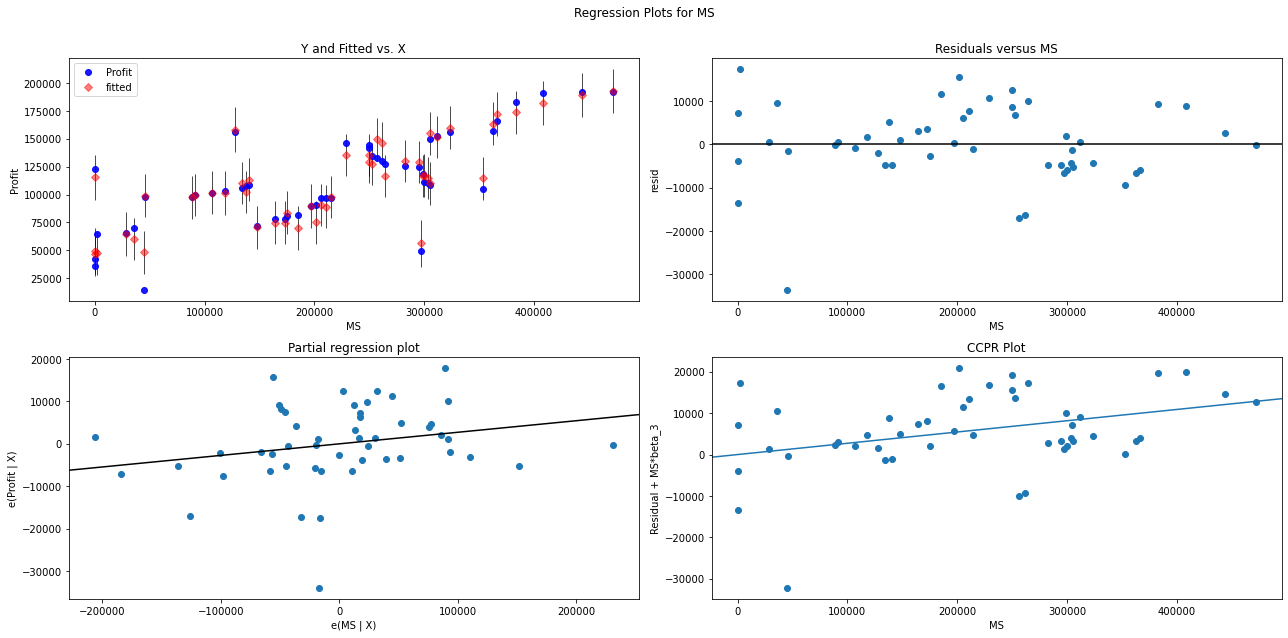

In [25]:
fig=plt.figure(figsize=(18,9))
sm.graphics.plot_regress_exog(model,'MS',fig=fig)
plt.show()

In [26]:
model_influence = model.get_influence()
(c, _) = model_influence.cooks_distance

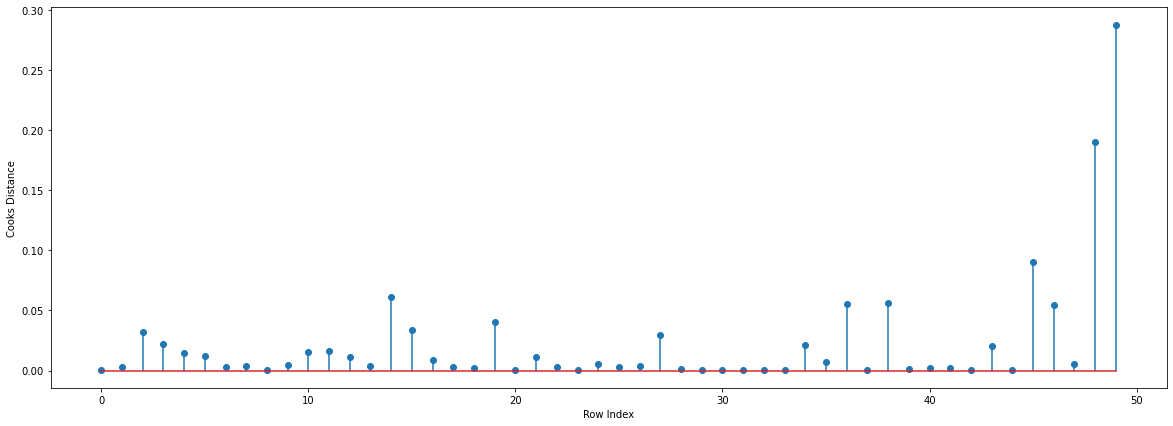

In [27]:
fig=plt.figure(figsize=(20,7))
plt.stem(np.arange(len(data1)),np.round(c,5))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [28]:
np.argmax(c), np.max(c)

(49, 0.2880822927543267)

<function matplotlib.pyplot.show(close=None, block=None)>

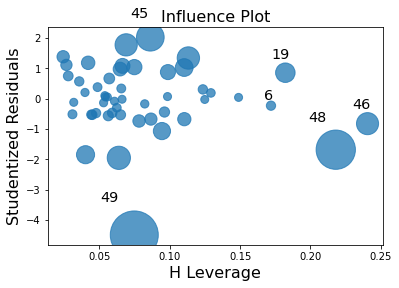

In [29]:
influence_plot(model)
plt.show

In [30]:
k=data1.shape[1]
n=data1.shape[0]
leverage_cutoff = (3*(k+1))/n
leverage_cutoff

0.36

In [31]:
data1[data1.index.isin([49])] 

,RD,ADS,MS,State,Profit
49,0.0,116983.8,45173.06,California,14681.4


In [32]:
data2=data1.drop(data1.index[[49]],axis=0).reset_index(drop=True)
data2

,RD,ADS,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


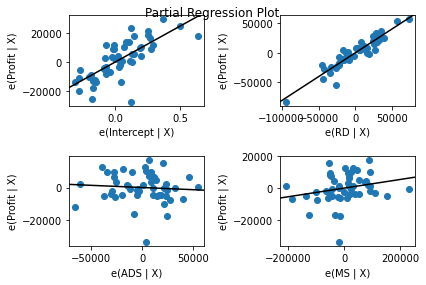

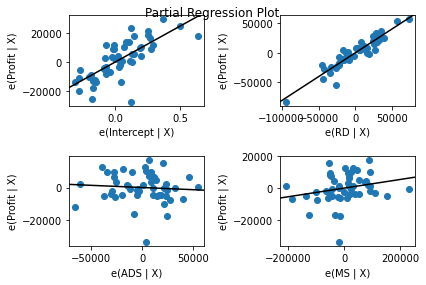

In [33]:
sm.graphics.plot_partregress_grid(model)

In [34]:
final_ml_v= smf.ols('Profit~RD+ADS+MS',data = data2).fit()
final_ml_v.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.961
Model:                            OLS   Adj. R-squared:                  0.959
Method:                 Least Squares   F-statistic:                     372.8
Date:                Tue, 19 Jul 2022   Prob (F-statistic):           8.85e-32
Time:                        22:17:23   Log-Likelihood:                -506.28
No. Observations:                  49   AIC:                             1021.
Df Residuals:                      45   BIC:                             1028.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   5.238e+04   5542.657      9.451      0.000    4.12e+04    6.35e+04
RD             0.7830      0.038     20.470      0.000       0.706       0.860
ADS           -0.0222      0.043     -0.518      0.607      -0.109       0.064
MS             0.0252      0.014      1.825      0.075      -0.003       0.053
==============================================================================
Omnibus:                        0.082   Durbin-Watson:                   1.598
Prob(Omnibus):                  0.960   Jarque-Bera (JB):                0.232
Skew:                          -0.082   Prob(JB):                        0.890
Kurtosis:                       2.706   Cond. No.                     1.41e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.41e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [35]:
model_influence_V = final_ml_v.get_influence()
(c_v, _) = model_influence_V.cooks_distance

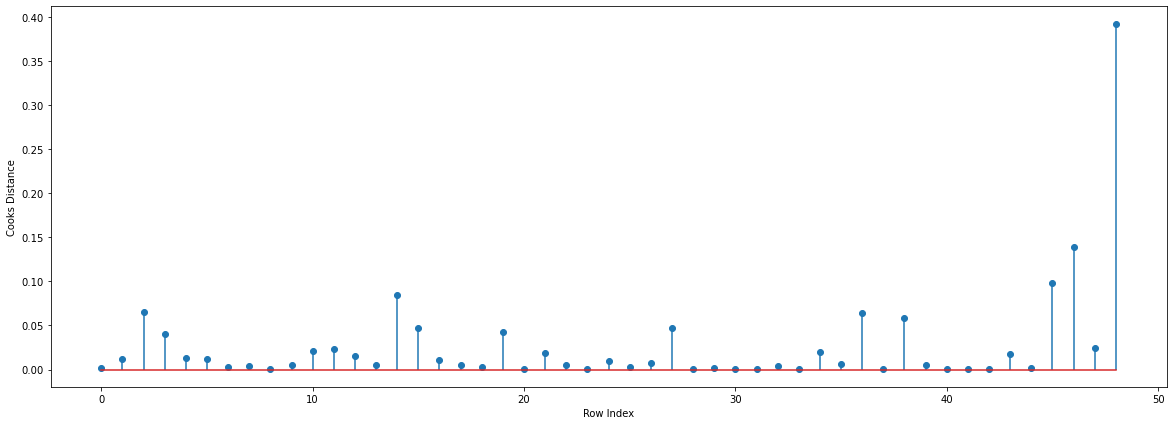

In [36]:
fig = plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data2)), np.round(c_v,5))
plt.xlabel('Row Index')
plt.ylabel('Cooks Distance')
plt.show()

In [37]:
np.argmax(c) ,np.max(c)

(49, 0.2880822927543267)

In [38]:
data2[data2.index.isin([48])] 

,RD,ADS,MS,State,Profit
48,542.05,51743.15,0.0,New York,35673.41


In [39]:
data3=data2.drop(data2.index[[48]],axis=0).reset_index(drop=True)
data3

,RD,ADS,MS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [40]:
final_ml_v_1= smf.ols('Profit~RD+ADS+MS',data = data3).fit()
final_ml_v_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Profit   R-squared:                       0.963
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     378.3
Date:                Tue, 19 Jul 2022   Prob (F-statistic):           2.03e-31
Time:                        22:17:59   Log-Likelihood:                -493.33
No. Observations:                  48   AIC:                             994.7
Df Residuals:                      44   BIC:                             1002.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    5.91e+04   5916.711      9.988      0.000    4.72e+04     7.1e+04
RD             0.7895      0.036     21.718      0.000       0.716       0.863
ADS           -0.0633      0.044     -1.442      0.156      -0.152       0.025
MS             0.0169      0.014      1.249      0.218      -0.010       0.044
==============================================================================
Omnibus:                        0.287   Durbin-Watson:                   1.809
Prob(Omnibus):                  0.866   Jarque-Bera (JB):                0.475
Skew:                           0.057   Prob(JB):                        0.789
Kurtosis:                       2.526   Cond. No.                     1.58e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.58e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
new_data=pd.DataFrame({'RD':65000,"ADS":13000,"MS":46000},index=[0])
new_data

,RD,ADS,MS
0,65000,13000,46000


In [42]:
final_ml_v_1.predict(new_data)

0    110369.310247
dtype: float64

In [43]:
pred_y=final_ml_v_1.predict(data3)
pred_y

0     188939.277484
1     185378.579127
2     180724.354190
3     172036.176973
4     171688.341312
5     163022.000480
6     158209.614122
7     158220.907984
8     150109.699290
9     154738.693091
10    136423.996608
11    136983.077541
12    129358.856016
13    127411.303969
14    148209.733354
15    146169.352040
16    117452.473394
17    129413.398834
18    129283.715044
19    117601.471936
20    117133.061217
21    116309.227099
22    114863.211696
23    110864.900559
24    116009.988463
25    103641.278061
26    111704.162860
27    113893.992032
28    101671.536476
29    103009.366384
30    102256.729372
31     99182.294414
32    101752.157668
33    100008.334349
34     89323.295403
35     93510.860091
36     77077.516667
37     93971.553437
38     74021.946441
39     87240.005930
40     77209.481295
41     78532.184335
42     74169.833041
43     63870.996869
44     67279.610923
45     52055.366556
46     57819.901390
47     50519.334182
dtype: float64

In [44]:
d2={'Prep_Models':['Model','Final_Model'],'Rsquared':[model.rsquared,final_ml_v_1.rsquared]}
table=pd.DataFrame(d2)
table

,Prep_Models,Rsquared
0,Model,0.950746
1,Final_Model,0.962677
